In [1]:
import pandas as pd
df=pd.read_csv('/content/my_merge.csv')

In [2]:
df.head()

,subject_id,Jitter(%),Jitter(Abs),Jitter(RAP),Jitter(PPQ5),Jitter:DDP,Shimmer(local),Shimmer(dB),Shimmer(APQ3),Shimmer(APQ5),Shimmer(APQ11),Shimmer(DDA),Class_info
0,1,0.662,0.000034,0.401,0.317,1.204,2.565,0.230,1.438,1.309,1.662,4.314,1
1,1,0.300,0.000017,0.132,0.150,0.395,2.024,0.179,0.994,1.072,1.689,2.982,1
2,1,0.481,0.000025,0.205,0.208,0.616,1.675,0.181,0.734,0.844,1.458,2.202,1
3,1,0.528,0.000027,0.191,0.264,0.573,2.309,0.327,1.106,1.265,1.963,3.317,1
4,1,0.335,0.000020,0.093,0.130,0.278,1.703,0.176,0.679,0.929,1.819,2.036,1


In [3]:
# Prepare training data for the machine learning model
# Define independent variables
ind_col = [col for col in df.columns if col!='Class_info']
ind_col=[col for col in ind_col if col!='subject_id']
#ind_col=[col for col in df.columns if col!='Subject_id']
# Define dependent variable
dep_col = 'Class_info'
print(ind_col)
print(dep_col)


['Jitter(%)', 'Jitter(Abs)', 'Jitter(RAP)', 'Jitter(PPQ5)', 'Jitter:DDP', 'Shimmer(local)', 'Shimmer(dB)', 'Shimmer(APQ3)', 'Shimmer(APQ5)', 'Shimmer(APQ11)', 'Shimmer(DDA)']
Class_info


In [4]:
X = df[ind_col]
y = df[dep_col]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Original dataset shape: Counter({1: 6394, 0: 520})
Resampled dataset shape: Counter({1: 6394, 0: 6394})


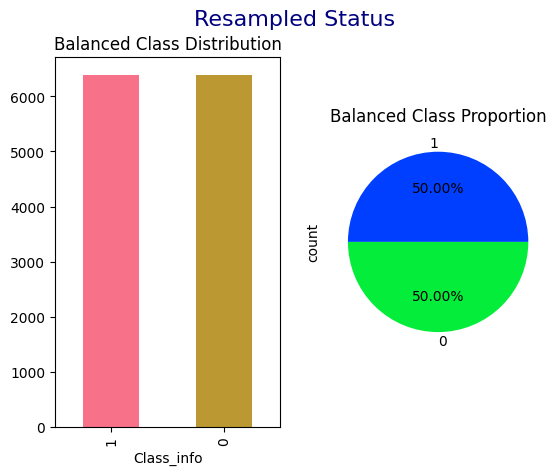

In [6]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Print the original distribution
print("Original dataset shape:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the resampled distribution
print("Resampled dataset shape:", Counter(y_resampled))

# Visualize the resampled data distribution
fig, ax = plt.subplots(1, 2)
fig.suptitle('Resampled Status', fontsize=16, color='navy')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1, 2, 1)
y_resampled.value_counts().plot(kind='bar', color=sns.color_palette("husl"))
plt.title('Balanced Class Distribution')

plt.subplot(1, 2, 2)
y_resampled.value_counts().plot(kind='pie', autopct="%.2f%%")
plt.title('Balanced Class Proportion')

plt.show()


In [7]:
smote_df = pd.concat([X_resampled, y_resampled], axis=1)

In [8]:
# Print the original columns to verify
print("Original columns:", smote_df.columns.tolist())

# Define the exact column names to drop
columns_to_drop = ['subject_id']

# Drop the columns if they exist in the DataFrame
smote_df.drop(columns=[col for col in columns_to_drop if col in smote_df.columns], inplace=True)

# Verify the remaining columns
print("Remaining columns:", smote_df.columns.tolist())

Original columns: ['Jitter(%)', 'Jitter(Abs)', 'Jitter(RAP)', 'Jitter(PPQ5)', 'Jitter:DDP', 'Shimmer(local)', 'Shimmer(dB)', 'Shimmer(APQ3)', 'Shimmer(APQ5)', 'Shimmer(APQ11)', 'Shimmer(DDA)', 'Class_info']
Remaining columns: ['Jitter(%)', 'Jitter(Abs)', 'Jitter(RAP)', 'Jitter(PPQ5)', 'Jitter:DDP', 'Shimmer(local)', 'Shimmer(dB)', 'Shimmer(APQ3)', 'Shimmer(APQ5)', 'Shimmer(APQ11)', 'Shimmer(DDA)', 'Class_info']


In [9]:
# Prepare training data for the machine learning model
# Define independent variables
ind_col = [col for col in smote_df.columns if col!='Class_info']
# Define dependent variable
dep_col = 'Class_info'

X = smote_df[ind_col]
y = smote_df[dep_col]

In [10]:
X.columns

Index(['Jitter(%)', 'Jitter(Abs)', 'Jitter(RAP)', 'Jitter(PPQ5)', 'Jitter:DDP',
       'Shimmer(local)', 'Shimmer(dB)', 'Shimmer(APQ3)', 'Shimmer(APQ5)',
       'Shimmer(APQ11)', 'Shimmer(DDA)'],
      dtype='object')

In [11]:
y.shape

(12788,)

In [12]:
from sklearn.model_selection import train_test_split

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

  XG BOOST

In [15]:
from xgboost import XGBClassifier

In [16]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=3,
    gamma=5,
    subsample=0.7,
    colsample_bytree=0.8,
    lambda_=5,
    alpha=2,
    random_state=42
)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy of XGBoost is 0.9185173600250235

Test Accuracy of XGBoost is 0.9122614951517047 

Test Precision of XGBoost is 0.91414567960982 

Test Recall of XGBoost is 0.9126572371892868 

Test F1_score of XGBoost is 0.9122072066504552 

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3161
           1       0.95      0.88      0.91      3233

    accuracy                           0.91      6394
   macro avg       0.91      0.91      0.91      6394
weighted avg       0.91      0.91      0.91      6394



<Axes: >

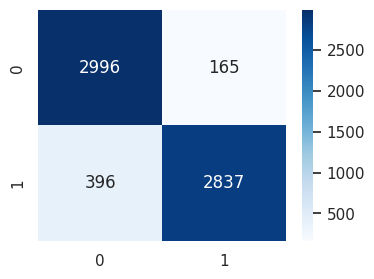

In [17]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(f'Training Accuracy of XGBoost is {accuracy_score(y_train, xgb.predict(X_train))}\n')

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average='macro')
xgb_recall = recall_score(y_test, y_pred, average='macro')
xgb_f1_score = f1_score(y_test, y_pred, average='macro')

#print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of XGBoost is {xgb_accuracy} \n")
print(f"Test Precision of XGBoost is {xgb_precision} \n")
print(f"Test Recall of XGBoost is {xgb_recall} \n")
print(f"Test F1_score of XGBoost is {xgb_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

KNN

Training Accuracy of KNN is 0.9476071316859556

Test Accuracy of KNN is 0.9325930559899906 

Test Precision of KNN is 0.9365119044801553 

Test Recall of KNN is 0.9331463740004049 

Test F1_score of KNN is 0.9324923160120588 

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94      3161
           1       0.98      0.88      0.93      3233

    accuracy                           0.93      6394
   macro avg       0.94      0.93      0.93      6394
weighted avg       0.94      0.93      0.93      6394

confusion matrix 


<Axes: >

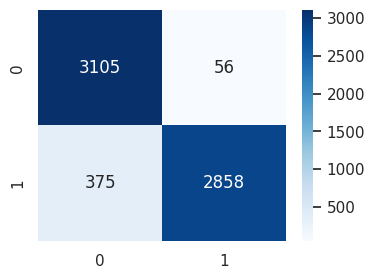

In [18]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create KNN classifier
knn = KNeighborsClassifier()
# Train KNN classifier
knn.fit(X_train, y_train)
# Use the trained model for prediction
y_pred = knn.predict(X_test)

print(f'Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}\n')

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='macro')
knn_recall = recall_score(y_test, y_pred, average='macro')
knn_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy of KNN is {knn_accuracy} \n")
print(f"Test Precision of KNN is {knn_precision} \n")
print(f"Test Recall of KNN is {knn_recall} \n")
print(f"Test F1_score of KNN is {knn_f1_score} \n")
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

print("confusion matrix ")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

Random forest classifier

Training Accuracy of Random Forest is 0.9427588364091336

Test Accuracy of Random Forest is 0.9239912417891774 

Test Precision of Random Forest is 0.9257254843523868 

Test Recall of Random Forest is 0.9243690966487347 

Test F1_score of Random Forest is 0.9239504967679468 

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3161
           1       0.96      0.89      0.92      3233

    accuracy                           0.92      6394
   macro avg       0.93      0.92      0.92      6394
weighted avg       0.93      0.92      0.92      6394

Confusion matrix:


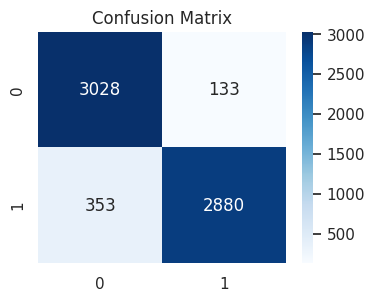

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    max_features="sqrt",
    min_samples_split=10,
    min_samples_leaf=5,
    bootstrap=True,  # Enable bootstrapping
    max_samples=0.8,  # Use only 80% of training data
    random_state=42
)

# Fit the model
rfc.fit(X_train, y_train)

# Predicting on test data
y_pred = rfc.predict(X_test)

# Training accuracy
print(f'Training Accuracy of Random Forest is {accuracy_score(y_train, rfc.predict(X_train))}\n')

# Model evaluation metrics
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred, average='macro')
rfc_recall = recall_score(y_test, y_pred, average='macro')
rfc_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy of Random Forest is {rfc_accuracy} \n")
print(f"Test Precision of Random Forest is {rfc_precision} \n")
print(f"Test Recall of Random Forest is {rfc_recall} \n")
print(f"Test F1_score of Random Forest is {rfc_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

# Confusion matrix
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


Ada Boost

Training Accuracy of AdaBoost is 0.8923991241789178

Test Accuracy of AdaBoost is 0.8877072255239287 

Test Precision of AdaBoost is 0.8900163834443736 

Test Recall of AdaBoost is 0.8881509324368 

Test F1_score of AdaBoost is 0.8876100632071784 

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3161
           1       0.92      0.85      0.88      3233

    accuracy                           0.89      6394
   macro avg       0.89      0.89      0.89      6394
weighted avg       0.89      0.89      0.89      6394

confusion matrix:


<Axes: >

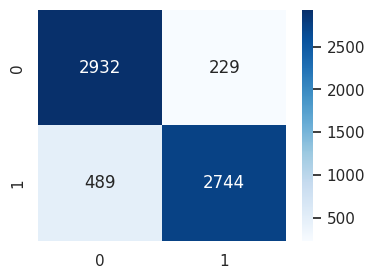

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print(f'Training Accuracy of AdaBoost is {accuracy_score(y_train, ada.predict(X_train))}\n')

ada_accuracy = accuracy_score(y_test, y_pred)
ada_precision = precision_score(y_test, y_pred, average='macro')
ada_recall = recall_score(y_test, y_pred, average='macro')
ada_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy of AdaBoost is {ada_accuracy} \n")
print(f"Test Precision of AdaBoost is {ada_precision} \n")
print(f"Test Recall of AdaBoost is {ada_recall} \n")
print(f"Test F1_score of AdaBoost is {ada_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')


Logistic Regression

Training Accuracy of Logistic Regression is 0.8925555208007507

Test Accuracy of Logistic Regression is 0.8923991241789178 

Test Precision of Logistic Regression is 0.8924375291488226 

Test Recall of Logistic Regression is 0.8923396838968745 

Test F1_score of Logistic Regression is 0.8923738414046494 

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3161
           1       0.89      0.90      0.89      3233

    accuracy                           0.89      6394
   macro avg       0.89      0.89      0.89      6394
weighted avg       0.89      0.89      0.89      6394

confusion matrix:


<Axes: >

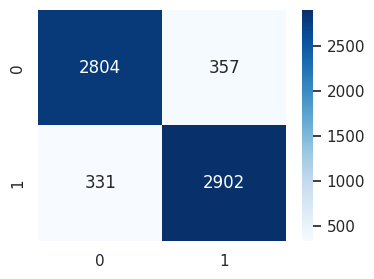

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f'Training Accuracy of Logistic Regression is {accuracy_score(y_train, logreg.predict(X_train))}\n')

logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred, average='macro')
logreg_recall = recall_score(y_test, y_pred, average='macro')
logreg_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy of Logistic Regression is {logreg_accuracy} \n")
print(f"Test Precision of Logistic Regression is {logreg_precision} \n")
print(f"Test Recall of Logistic Regression is {logreg_recall} \n")
print(f"Test F1_score of Logistic Regression is {logreg_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

MLP classifier

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Accuracy of MLP is 0.925555208007507

Test Accuracy of MLP is 0.9214888958398498 

Test Precision of MLP is 0.9215406154489512 

Test Recall of MLP is 0.921577574195561 

Test F1_score of MLP is 0.921488404221023 

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3161
           1       0.93      0.91      0.92      3233

    accuracy                           0.92      6394
   macro avg       0.92      0.92      0.92      6394
weighted avg       0.92      0.92      0.92      6394

confusion matrix:


<Axes: >

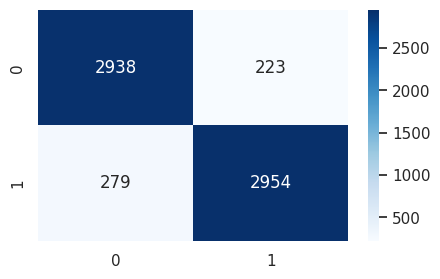

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(f'Training Accuracy of MLP is {accuracy_score(y_train, mlp.predict(X_train))}\n')

mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred, average='macro')
mlp_recall = recall_score(y_test, y_pred, average='macro')
mlp_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy of MLP is {mlp_accuracy} \n")
print(f"Test Precision of MLP is {mlp_precision} \n")
print(f"Test Recall of MLP is {mlp_recall} \n")
print(f"Test F1_score of MLP is {mlp_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")


print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (5, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

MLP using deep neural networks

In [23]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define an MLP with Fully Connected Layers
model = Sequential([
    Dense(16, activation='relu', input_shape=(11,)),  # Input Layer (12 features) -> 16 neurons
    Dense(8, activation='relu'),  # Hidden Layer with 8 neurons
    Dense(1, activation='sigmoid')  # Output Layer (1 neuron, sigmoid for binary classification)
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of Model Architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
print(X_train.shape)
print(X_test.shape)

(6394, 11)
(6394, 11)


In [25]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6701 - loss: 0.6157 - val_accuracy: 0.8536 - val_loss: 0.3852
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.3824 - val_accuracy: 0.8750 - val_loss: 0.3395
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8752 - loss: 0.3474 - val_accuracy: 0.8868 - val_loss: 0.3191
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8981 - loss: 0.3005 - val_accuracy: 0.8901 - val_loss: 0.3088
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8908 - loss: 0.3020 - val_accuracy: 0.8905 - val_loss: 0.3002
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8954 - loss: 0.2940 - val_accuracy: 0.8938 - val_loss: 0.2952
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8989 - loss: 0.2848 - val_accuracy: 0.8963 - val_loss: 0.2897
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9011 - loss: 0.2707 - val_accuracy: 0.

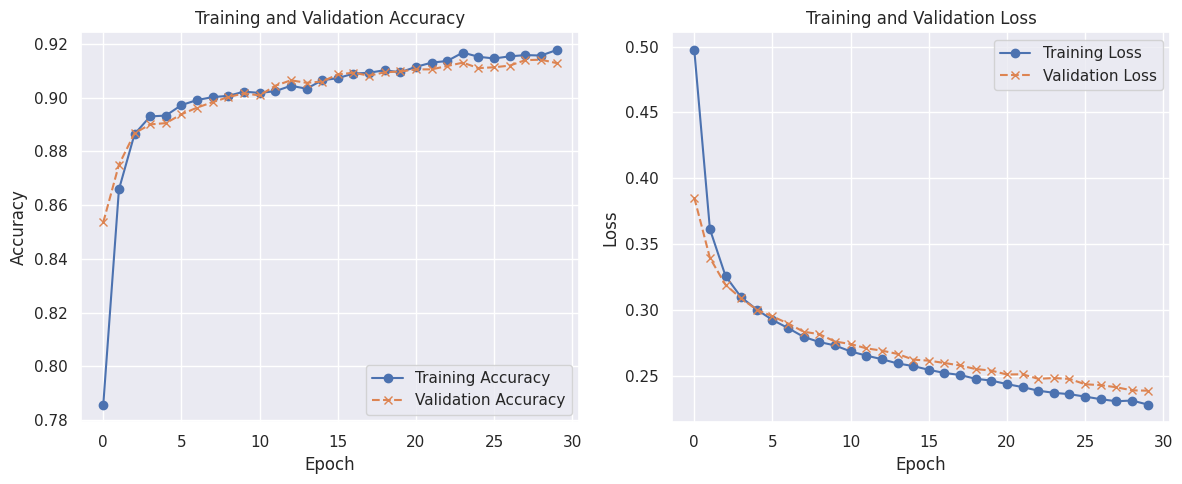

In [26]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test loss:{test_loss:.4f}")

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9127 - loss: 0.2411
Test Accuracy: 0.9129
Test loss:0.2388


In [28]:
# Predict Probabilities
y_pred_prob = model.predict(X_test)

# Convert Probabilities to Binary Labels (Threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert True/False to 1/0


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step


Accuracy: 0.9129
Precision: 0.9269
Recall: 0.8985
F1 Score: 0.9125
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3161
           1       0.93      0.90      0.91      3233

    accuracy                           0.91      6394
   macro avg       0.91      0.91      0.91      6394
weighted avg       0.91      0.91      0.91      6394

confusion matrix:


<Axes: >

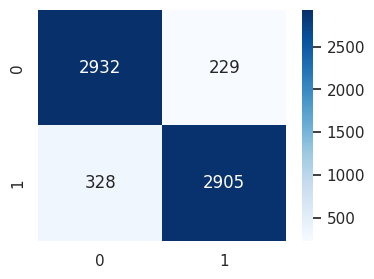

In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

CAT boos

In [30]:
!pip install --upgrade catboost

0:	learn: 0.6504550	total: 49.7ms	remaining: 24.8s
100:	learn: 0.2307355	total: 560ms	remaining: 2.21s
200:	learn: 0.1878008	total: 1.14s	remaining: 1.7s
300:	learn: 0.1576696	total: 1.77s	remaining: 1.17s
400:	learn: 0.1372326	total: 2.45s	remaining: 605ms
499:	learn: 0.1211381	total: 3.07s	remaining: 0us
Training Accuracy of CatBoost is 0.9640287769784173

Test Accuracy of CatBoost is 0.9375977478886456 

Test Precision of CatBoost is 0.938727358642244 

Test Recall of CatBoost is 0.9379051134824135 

Test F1_score of CatBoost is 0.937580267777379 

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3161
           1       0.96      0.91      0.94      3233

    accuracy                           0.94      6394
   macro avg       0.94      0.94      0.94      6394
weighted avg       0.94      0.94      0.94      6394



<Axes: >

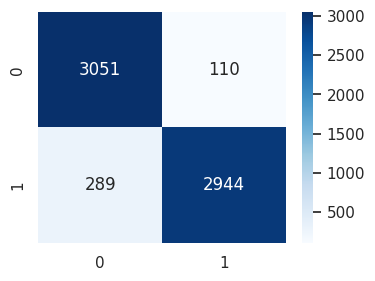

In [31]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=500,   # Reduce total trees (default is 1000+)
    depth=5,          # Reduce depth (default 6-10)
    l2_leaf_reg=8,    # Increase L2 regularization
    learning_rate=0.05,  # Reduce learning rate
    random_seed=42,
    verbose=100
)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)

print(f'Training Accuracy of CatBoost is {accuracy_score(y_train, cat_model.predict(X_train))}\n')

cat_accuracy = accuracy_score(y_test, y_pred)
cat_precision = precision_score(y_test, y_pred, average='macro')
cat_recall = recall_score(y_test, y_pred, average='macro')
cat_f1_score = f1_score(y_test, y_pred, average='macro')

#print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of CatBoost is {cat_accuracy} \n")
print(f"Test Precision of CatBoost is {cat_precision} \n")
print(f"Test Recall of CatBoost is {cat_recall} \n")
print(f"Test F1_score of CatBoost is {cat_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

SVM

Training Accuracy of SVM is 0.9033468877072255

Test Accuracy of SVM is 0.9017829214888958 

Test Precision of SVM is 0.9021136739063933 

Test Recall of SVM is 0.9019606902990387 

Test F1_score of SVM is 0.9017798079053978 

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3161
           1       0.92      0.89      0.90      3233

    accuracy                           0.90      6394
   macro avg       0.90      0.90      0.90      6394
weighted avg       0.90      0.90      0.90      6394



<Axes: >

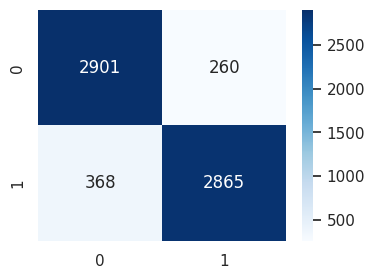

In [32]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f'Training Accuracy of SVM is {accuracy_score(y_train, svm.predict(X_train))}\n')

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='macro')
svm_recall = recall_score(y_test, y_pred, average='macro')
svm_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy of SVM is {svm_accuracy} \n")
print(f"Test Precision of SVM is {svm_precision} \n")
print(f"Test Recall of SVM is {svm_recall} \n")
print(f"Test F1_score of SVM is {svm_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

accuracy ranking

In [33]:
import plotly.express as px

In [34]:
accuracy = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'SVM', 'Random Forest', 'AdaBoost', 'XGBoost', 'CatBoost', 'MLP'],
    'Score': [knn_accuracy, logreg_accuracy, svm_accuracy, rfc_accuracy, ada_accuracy, xgb_accuracy, cat_accuracy,mlp_accuracy]})
accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
fig = px.bar(data_frame=accuracy_sorted, x='Model', y='Score', color='Score',
             title='Accuracy Comparison', text='Score')
fig.update_layout(width=800, height=600)
fig.show()

STACKING CLASSIFIER

Random Forest as meta learner

Stacking Classifier Accuracy: 0.9500
Stacking Classifier Precision: 0.9507
Stacking Classifier Recall: 0.9502
Stacking Classifier F1 Score: 0.9499


<Axes: >

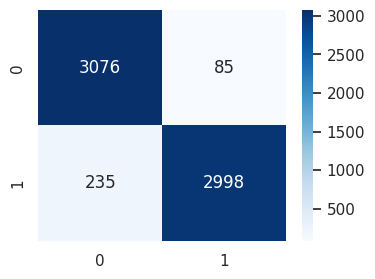

In [51]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# Calibrated SVM to improve probability estimates
svm_calibrated = CalibratedClassifierCV(svm, method='sigmoid')
svm_calibrated.fit(X_train, y_train)

# Define base learners
base_learners = [
    ('Logistic Regression', logreg),
    ('Random Forest', rfc),
    ('XGBoost', xgb),
    ('CatBoost', cat_model),
    ('SVM', svm_calibrated),
    ('KNN', knn),
    ('MLP', mlp)
]

# Meta-classifier
meta_classifier = LogisticRegression()

# Stacking Classifier
stacking_clf6 = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_classifier,
    stack_method='predict_proba',  # Use probabilities as input to meta-classifier
    n_jobs=-1  # Utilize all available CPU cores
)

# Train the stacking classifier
stacking_clf6.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf6.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier Precision: {precision:.4f}")
print(f"Stacking Classifier Recall: {recall:.4f}")
print(f"Stacking Classifier F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={"figure.figsize": (4, 3)})
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')


In [55]:
#PREDICTING CELL:
# Create a dictionary with the unseen data
unseen_data ={'Jitter(%)': [0.010674], 'Jitter(Abs)': [5e-05], 'Jitter(RAP)': [0.006151], 'Jitter(PPQ5)': [0.005437], 'Jitter:DDP': [0.018452], 'Shimmer(local)': [0.078099], 'Shimmer(dB)': [0.799478], 'Shimmer(APQ3)': [0.036303], 'Shimmer(APQ5)': [0.036699], 'Shimmer(APQ11)': [0.066918], 'Shimmer(DDA)': [0.108908]}

# Convert the dictionary to a DataFrame
unseen_df = pd.DataFrame(unseen_data)

# Scale the features using the same scaler used for training
unseen_scaled = scaler.transform(unseen_df)

# Make prediction using the trained XGBoost model
prediction = stacking_clf6.predict(unseen_scaled)

# Get prediction probabilities
probabilities = stacking_clf6.predict_proba(unseen_scaled) # Changed to predict_proba

# Print the results
print("Predicted Class:", prediction[0])
print("Probability for Class 0:", probabilities[0][0])
print("Probability for Class 1:", probabilities[0][1])

# Interpretation
if prediction[0] == 0:
    print("Interpretation: The model predicts this is NOT a Parkinson's case")
else:
    print("Interpretation: The model predicts this IS a Parkinson's case")

Predicted Class: 1
Probability for Class 0: 0.2732967447129344
Probability for Class 1: 0.7267032552870656
Interpretation: The model predicts this IS a Parkinson's case


In [46]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']